<center><h1>QBUS2820 - Predictive Analytics</h1></center>

# Tutorial 11 - Exponential smoothing
<br>

In this tutorial we will study how to apply exponential smoothing methods to forecast seasonal data in Python.

We need to use forecast.py and statlearning.py modules for this tutroial as we did for tutorial 12. 

<a class="buttom" href=">#Data:-NSW-retail-turnover">Data: NSW retail turnover</a> <br>
<a class="buttom" href="#Time-series-decomposition">Time series decomposition</a> <br>
<a class="buttom" href="#Trend-corrected-exponential-Smoothing">Trend corrected exponential smoothing</a> <br>
<a class="buttom" href="#Hold-Exponential-Smoothing">Holt-Winters smoothing</a> <br>
<a class="buttom" href="#Model-diagnostics">Model diagnostics</a> <br>
<a class="buttom" href="#Model-validation">Model validation</a> <br>
<a class="buttom" href="#Forecast">Forecast</a> <br>

This notebook relies on the following imports and settings

In [2]:
# Packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
# Plot settings
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline

## Data: NSW Retail turnover

In this tutorial we will keep working with the Australian retail turnover series. The next cells load the data and reproduces some of the steps from last week. 

In [4]:
data = pd.read_csv('nswretail.csv', index_col='Month', parse_dates=True, dayfirst=True)
data.tail()

,Turnover
Month,
2017-02-01,7298.9
2017-03-01,8085.8
2017-04-01,7883.7
2017-05-01,8132.0
2017-06-01,8130.1


In [24]:
y = data['Turnover'].copy()
y.index = y.index.to_period(freq='M')

ts = data['Turnover']

In [6]:
data.describe().round(2)

,Turnover
count,138.00
mean,6611.42
std,1168.73
min,4496.90
25%,5769.78
50%,6347.20
75%,7450.70
max,10783.10


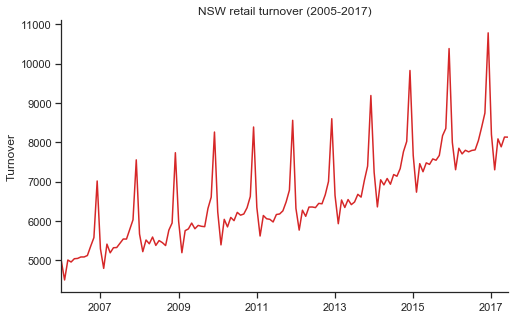

In [7]:
fig, ax= plt.subplots(figsize=(8,5))
y.plot(color=red)
ax.set_xlabel('')
ax.set_ylabel('Turnover')
ax.set_title('NSW retail turnover (2005-2017)')
ax.set_xticks([], minor=True)
sns.despine()
plt.show()

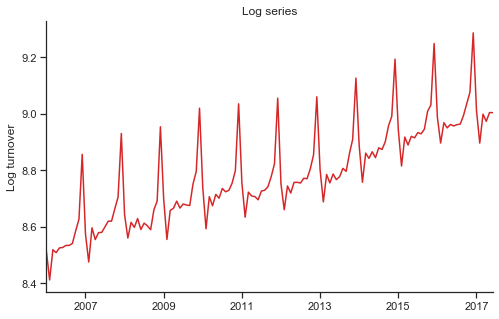

In [8]:
fig, ax= plt.subplots(figsize=(8,5))
np.log(y).plot(color=red)
ax.set_xlabel('')
ax.set_ylabel('Log turnover')
ax.set_title('Log series')
ax.set_xticks([], minor=True)
sns.despine()
plt.show()

## Time series decomposition

### Note: you do NOT have to use this time series decomposition package for the assignment. We should also note that X-13 ARIMA can only be applied to monthly or quarterly data for time series decomposition. 

There are many other time series decomposition methods and packages, e.g. http://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html?highlight=decomposition

We use the X-13 ARIMA-SEATS method for time series decomposition. The X-13 method is a state-of-art time series decomposition approach devoloped and provided by the [US Census Bureau](https://www.census.gov/srd/www/x13as/) as external software. You need to make the X-13 software available to Python by downloading it from the link and extracting the compressed folder to your computer. The <TT>statsmodels</TT> library has a function that interfaces with this software, and the easiest way to get it to work is to copy the <TT>x13as</TT> executable to the same folder as your notebook.  

The X-13 is the current version of the X-12-ARIMA method described in the [textbook](https://www.otexts.org/fpp/6/4). The only limitation is that the X-13 software makes calendar effect adjustments based on the US calendar by default, though it is possible to reconfigure it to other calendars. Refer to the [ABS](http://abs.gov.au/websitedbs/d3310114.nsf/4a256353001af3ed4b2562bb00121564/c890aa8e65957397ca256ce10018c9d8) for the seasonal adjustment standards in Australia. 

In [21]:
import os
decomposition = sm.tsa.x13_arima_analysis(ts, x12path = os.getcwd())
print(decomposition.trend)

Month
2006-01-01    5075.226549
2006-02-01    5107.830287
2006-03-01    5143.173777
2006-04-01    5179.684153
2006-05-01    5213.838607
                 ...     
2017-02-01    8277.036241
2017-03-01    8313.173248
2017-04-01    8365.697777
2017-05-01    8424.357723
2017-06-01    8477.418517
Name: trend, Length: 138, dtype: float64


You can use the <TT>dir</TT> method to check the available output. 

In [22]:
ts

Month
2006-01-01    4979.4
2006-02-01    4496.9
2006-03-01    5003.8
2006-04-01    4953.0
2006-05-01    5036.8
               ...  
2017-02-01    7298.9
2017-03-01    8085.8
2017-04-01    7883.7
2017-05-01    8132.0
2017-06-01    8130.1
Name: Turnover, Length: 138, dtype: float64

For example, if we want to retrieve and plot the seasonally adjusted component, we can do as follows.

In [13]:
decomposition.seasadj.tail()

Month
2017-02-01    8263.077126
2017-03-01    8321.825080
2017-04-01    8334.278108
2017-05-01    8425.606055
2017-06-01    8507.854903
Name: seasadj, dtype: float64

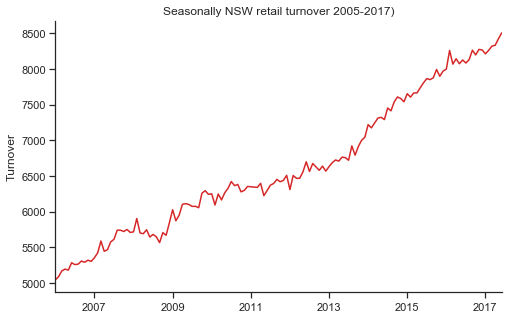

In [14]:
fig, ax= plt.subplots(figsize=(8,5))
decomposition.seasadj.plot(color=red)
ax.set_xlabel('')
ax.set_ylabel('Turnover')
ax.set_title('Seasonally NSW retail turnover 2005-2017)')
ax.set_xticks([], minor=True) # I prefer to remove the minor ticks for a cleaner plot
sns.despine()
plt.show()

The <TT>forecast</TT> module has a convenient function for plotting the components. 

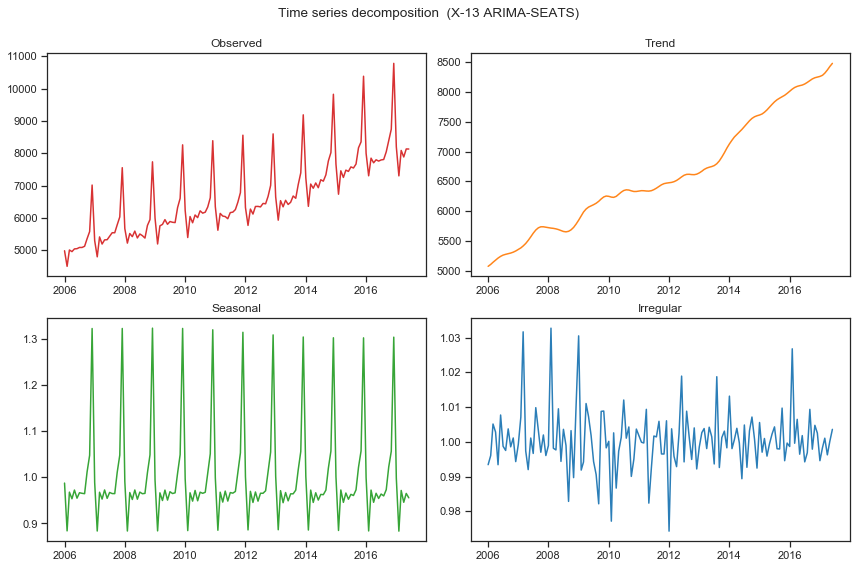

In [17]:
from forecast import plot_components_x13
plot_components_x13(decomposition)
plt.show()
decomposition

In [18]:
ts

Month
2006-01-01    4979.4
2006-02-01    4496.9
2006-03-01    5003.8
2006-04-01    4953.0
2006-05-01    5036.8
               ...  
2017-02-01    7298.9
2017-03-01    8085.8
2017-04-01    7883.7
2017-05-01    8132.0
2017-06-01    8130.1
Name: Turnover, Length: 138, dtype: float64

The X-13-ARIMA software generates a very detailed analysis of the time series, which is stored in the <TT>results</TT> attribute. You can view it with the <TT>print(decomposition.results)</TT> command, but due to the length I recommend saving it to a text file and opening it elsewhere. You can do this as follows.  

In [13]:
f=open('x13results.txt', mode='w+')
f.write(decomposition.results)
f.close()

Feel free to use information from the X-13-ARIMA report in your assignment, as long as you can justify and explain it.

In case you are not able to work with the X13 decomposition software, a more basic decomposition is available as follows.

In [14]:
basic_decomposition = sm.tsa.seasonal_decompose(ts, model='multiplicative')

## Trend corrected exponential smoothing

Before we model and forecast the original series, the next cells demonstrate the application of the trend corrected exponential smoothing method, focusing on the seasonally adjusted series for coherence. 

In [15]:
ts=decomposition.seasadj
ts.index=ts.index.to_period(freq='M')

In [16]:
import forecast
holt = forecast.holt(ts)
holt.fit()
holt.summary()

 Holt (trend corrected) exponential smoothing

 Smoothing parameters: 
 alpha (level) 0.300 (0.000)
 beta (trend)  0.050 (0.000)
 
 In-sample fit:
 MSE               7715.519
 Log-likelihood   -813.432
 AIC               1632.864
 BIC               1641.645


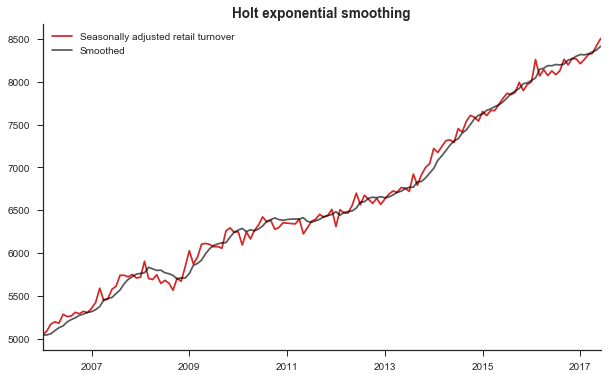

In [17]:
smoothed=pd.Series(holt.smooth(), index=y.index)

fig, ax= plt.subplots(figsize=(10,6))

ts.plot(color='#D62728', label='Seasonally adjusted retail turnover')
smoothed.plot(color='black', label='Smoothed', alpha=0.65)
plt.legend(loc='best')
ax.set_xlabel('')
ax.set_xticks([], minor=True)
ax.set_title(r'Holt exponential smoothing', fontsize=13.5, fontweight='bold')
sns.despine()
plt.show()

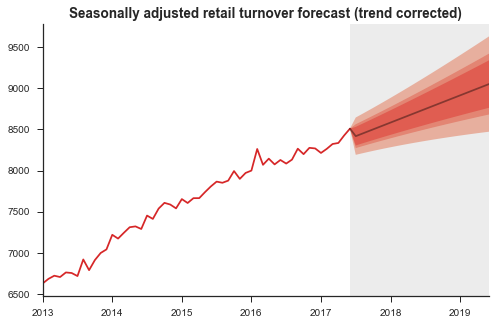

In [18]:
h=24

test=pd.period_range(start=ts.index[-1]+1, periods=h, freq='M')

pred=pd.Series(holt.forecast(h), index=test)

intv1=pd.DataFrame(holt.intervalforecast(h, level=.8), index=test)
intv2=pd.DataFrame(holt.intervalforecast(h, level=.9), index=test)
intv3=pd.DataFrame(holt.intervalforecast(h, level=.99), index=test)

fig, ax = forecast.fanchart(ts['01-2013':], pred, intv1, intv2, intv3)
ax.set_xlabel('')
ax.set_xticks([], minor=True)
plt.title('Seasonally adjusted retail turnover forecast (trend corrected)', fontsize=13.5, fontweight='bold')

sns.despine()
plt.show()

## Holt-winters exponential smoothing

We estimate several candidate specifications below.  The AIC suggests a multiplicative model without damping for the original series, but we would need to make a likelihood adjustment or a validation set comparison to selected between this method and an additive model for a log transformation. 

In [19]:
ahw=forecast.holtwinters(y, additive=True, damped=False, m=12)
ahw.fit()
ahw.summary()

 Additive Holt-winters exponential smoothing

 Smoothing parameters:
 alpha (level)    0.100 (0.000)
 beta  (trend)    0.100 (0.000)
 delta (seasonal) 0.050 (0.000)
 
 In-sample fit:
 MSE               37489.079
 RMSE              193.621
 Log-likelihood   -922.508
 AIC               1853.016
 BIC               1864.725


In [20]:
mhw=forecast.holtwinters(y, additive=False, damped=False, m=12)
mhw.fit()
mhw.summary()

 Multiplicative Holt-winters exponential smoothing

 Smoothing parameters:
 alpha (level)    0.100 (0.000)
 beta  (trend)    0.100 (0.000)
 delta (seasonal) 0.050 (0.000)
 
 In-sample fit:
 MSE               29720.262
 RMSE              172.396
 Log-likelihood   -906.485
 AIC               1820.970
 BIC               1832.679


In [21]:
mhw_damped=forecast.holtwinters(y, additive=False, damped=True, m=12)
mhw_damped.fit()
mhw_damped.summary()

 Multiplicative Holt-winters exponential smoothing (damped trend)

 Smoothing parameters:
 alpha (level)    0.100 (0.000)
 beta  (trend)    0.100 (0.000)
 delta (seasonal) 0.050 (0.000)
 phi (damping)    0.980 (0.000)
 
 In-sample fit:
 MSE               28733.075
 RMSE              169.508
 Log-likelihood   -904.154
 AIC               1818.308
 BIC               1832.944


In [22]:
ahw_log=forecast.holtwinters(np.log(y), additive=True, damped=False, m=12)
ahw_log.fit()
ahw_log.summary()

 Additive Holt-winters exponential smoothing

 Smoothing parameters:
 alpha (level)    0.100 (0.000)
 beta  (trend)    0.100 (0.000)
 delta (seasonal) 0.050 (0.000)
 
 In-sample fit:
 MSE               0.001
 RMSE              0.027
 Log-likelihood    300.789
 AIC               -593.579
 BIC               -581.870


The smoothed series based on the multiplicative method tracks the original series very closely.

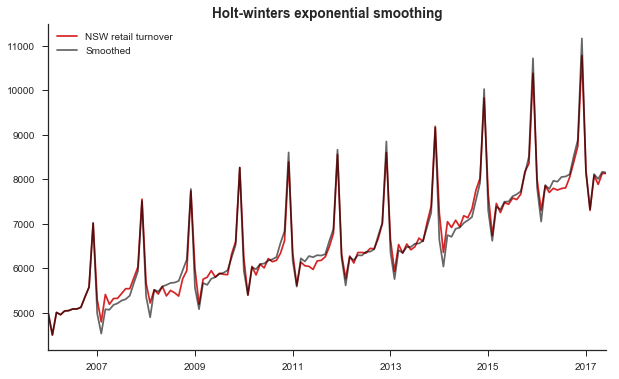

In [23]:
smoothed=pd.Series(mhw.smooth(), index=y.index)

fig, ax= plt.subplots(figsize=(10,6))

y.plot(color='#D62728', label='NSW retail turnover')
smoothed.plot(color='black', label='Smoothed', alpha=0.6)
plt.legend(loc='best')
ax.set_xlabel('')
ax.set_xticks([], minor=True)
ax.set_title(r'Holt-winters exponential smoothing', fontsize=13.5, fontweight='bold')
sns.despine()
plt.show()

## Model diagnostics

We base the diagnostics on the multiplicative Holt-Winters model.  The model seems to adequately capture the time series patterns in the data, leading to small and insignicant residual correlations. The residuals do not follow the normal distribution, so that ideally we should use alternative assumptions for computing prediction intervals. 

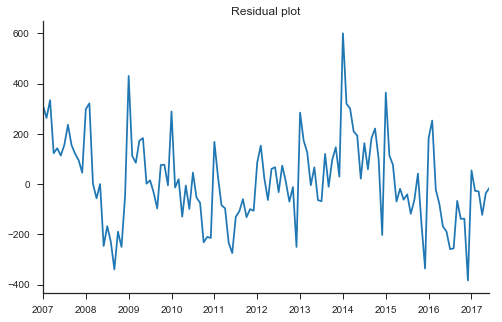

In [24]:
resid = (y-mhw.smooth())[12:] # we remove the first 12 observations as they are for initialisitation only

fig, ax= plt.subplots(figsize=(8,5))
resid.plot(color=blue)
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

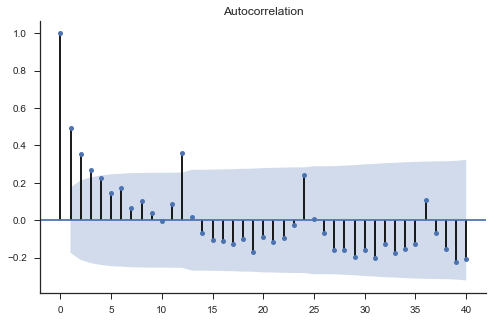

In [25]:
fig, ax = plt.subplots(figsize=(8,5))
sm.graphics.tsa.plot_acf(resid, lags=40, ax=ax)
sns.despine()
plt.show()

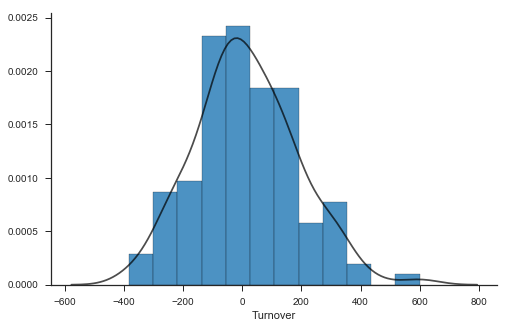

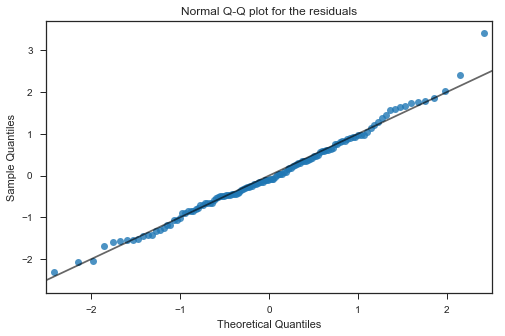

In [26]:
from forecast import histogram, qq_plot

histogram(resid)
plt.show()

qq_plot(resid)
plt.show()

In [27]:
print('Residual skewness: {:.3f}'.format(resid.skew()))
print('Residual kurtosis: {:.3f}'.format(resid.kurt()))

Residual skewness: 0.340
Residual kurtosis: 0.359


## Model validation

The real time forecasting analysis suggests that the log additive Holt Winters model for the log series is the most accurate method for one step ahead forecasts. The Holt-Winters forecasts perform significantly better than a seasonal random walk. 

In [28]:
# Real time forecasting 

ts=np.log(y) # log series for the log-additive model

validation=y['2012-01':].index
start = y.index.get_loc('2012-01') 

pred1 = [] # seasonal random walk
pred2 = [] # additive holt winters
pred3 = [] # mutiplicative holt winters
pred4 = [] # log additive holt winters
actual= []

for i in range(start, len(y)):
    
    actual.append(y.iloc[i]) # actual value
    
    pred1.append(y.iloc[i-12]) # seasonal random walk forecast
    
    model = forecast.holtwinters(y.iloc[:i], additive=True, damped=False, m=12)
    model.fit()
    pred2.append(model.forecast(1)[0]) # additive holt winters forecast
    
    model = forecast.holtwinters(y.iloc[:i], additive=False, damped=False, m=12)
    model.fit()
    pred3.append(model.forecast(1)[0]) # multiplicate holt winters forecast
    
    model = forecast.holtwinters(ts.iloc[:i], additive=True, damped=False, m=12)
    model.fit()
    resid = (ts.iloc[:i]-model.smooth())[12:] # residuals
    y_pred = np.exp(model.forecast(1)[0])*np.mean(np.exp(resid)) # forecast with a retransformation adjustment 
    pred4.append(y_pred) # long additive holt winters forecast

columns=['Seasonal RW', 'Additive', 'Multiplicative', 'Log additive', 'Actual']
results = np.vstack([pred1,pred2,pred3,pred4,actual]).T
results = pd.DataFrame(results, columns=columns, index=validation)

In [29]:
from statlearning import rmse_jack

table = pd.DataFrame(0.0, index=results.columns[:-1], columns=['RMSE','SE'])
for i in range(4):
    table.iloc[i,0], table.iloc[i,1] = rmse_jack(results.iloc[:,i], results.iloc[:,-1])
table.round(2)

,RMSE,SE
Seasonal RW,385.73,21.12
Additive,225.96,24.60
Multiplicative,185.68,20.88
Log additive,187.79,20.15


## Forecast

Finally, we generate a two year forecast based on the selected model. 

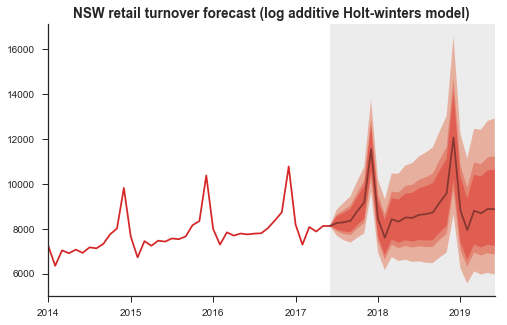

In [30]:
h=24

test=pd.period_range(start=y.index[-1]+1, periods=h, freq='M')

pred=pd.Series(ahw_log.forecast(h), index=test)
var = ahw_log.forecastvariance(h)
pred=np.exp(pred+var/2) # retransformation under the assumption of normality, for simplicity

intv1=pd.DataFrame(ahw_log.intervalforecast(h, level=.8), index=test)
intv2=pd.DataFrame(ahw_log.intervalforecast(h, level=.9), index=test)
intv3=pd.DataFrame(ahw_log.intervalforecast(h, level=.99), index=test)
intv1=np.exp(intv1)
intv2=np.exp(intv2)
intv3=np.exp(intv3)

fig, ax = forecast.fanchart(y['01-2014':], pred, intv1, intv2, intv3)
ax.set_xlabel('')
ax.set_xticks([], minor=True)

plt.title('NSW retail turnover forecast (log additive Holt-winters model)', fontsize=13.5, fontweight='bold')
sns.despine()
plt.show()